In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('36_titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [4]:
df.shape

(891, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [6]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [7]:
x = df.drop(columns='Survived')
y = df['Survived']

In [8]:
x

,Age,Fare,Family
0,22.0,7.2500,1
1,38.0,71.2833,1
2,26.0,7.9250,0
3,35.0,53.1000,1
4,35.0,8.0500,0
...,...,...,...
886,27.0,13.0000,0
887,19.0,30.0000,0
888,NaN,23.4500,3
889,26.0,NaN,0


In [9]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [12]:
x_train.shape

(712, 3)

In [13]:
x_train.head()

,Age,Fare,Family
421,21.0,7.7333,0
654,18.0,6.7500,0
346,40.0,13.0000,0
495,NaN,14.4583,0
784,25.0,7.0500,0


In [14]:
x_train.isnull().mean()

Age       0.193820
Fare      0.050562
Family    0.000000
dtype: float64

In [15]:
x_test.shape

(179, 3)

In [17]:
x_train['age_99'] = x_train['Age'].fillna(99)
x_train['age_-1'] = x_train['Age'].fillna(-1)
x_train['fare_999'] =x_train['Fare'].fillna(999)
x_train['fare_-1'] = x_train['Fare'].fillna(-1)

In [18]:
x_train.head()

,Age,Fare,Family,age_99,age_-1,fare_999,fare_-1
421,21.0,7.7333,0,21.0,21.0,7.7333,7.7333
654,18.0,6.7500,0,18.0,18.0,6.7500,6.7500
346,40.0,13.0000,0,40.0,40.0,13.0000,13.0000
495,NaN,14.4583,0,99.0,-1.0,14.4583,14.4583
784,25.0,7.0500,0,25.0,25.0,7.0500,7.0500


In [19]:
print('Original Age variable variance: ', x_train['Age'].var())
print('Age Variance after median imputation: ', x_train['age_99'].var())
print('Age Variance after mean imputation: ',x_train['age_-1'].var())

print('Original Fare variable variance: ', x_train['Fare'].var())
print('Fare Variance after median imputation: ', x_train['fare_999'].var())
print('Fare Variance after mean imputation: ', x_train['fare_-1'].var())

Original Age variable variance:  211.54923239870874
Age Variance after median imputation:  920.701638031575
Age Variance after mean imputation:  318.5188285687197
Original Fare variable variance:  2868.0946892509646
Fare Variance after median imputation:  47540.252109808636
Fare Variance after mean imputation:  2779.9375884033625


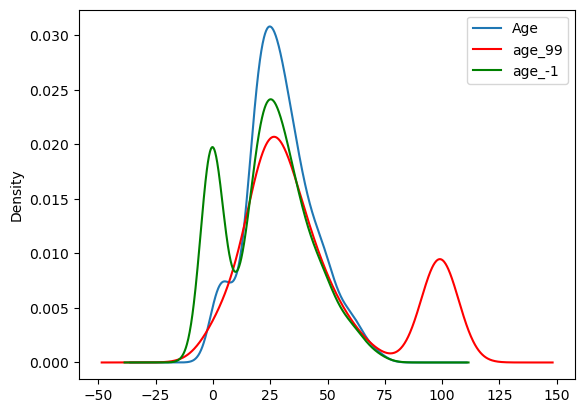

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
x_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
x_train['age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
x_train['age_-1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

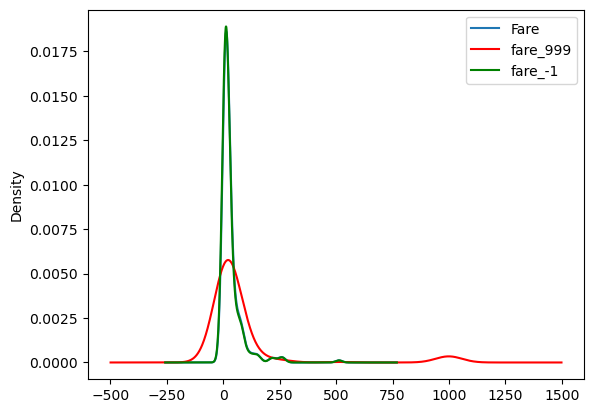

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
x_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
x_train['fare_999'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
x_train['fare_-1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [22]:
x_train.cov()

,Age,Fare,Family,age_99,age_-1,fare_999,fare_-1
Age,211.549232,83.468859,-6.750024,211.549232,211.549232,43.680055,80.309567
Fare,83.468859,2868.094689,19.721149,-76.569137,130.922154,2868.094689,2868.094689
Family,-6.750024,19.721149,2.811341,-6.651488,-4.901697,17.326451,18.772428
age_99,211.549232,-76.569137,-6.651488,920.701638,-162.758325,-287.145916,-65.040004
age_-1,211.549232,130.922154,-4.901697,-162.758325,318.518829,178.390305,122.362871
fare_999,43.680055,2868.094689,17.326451,-287.145916,178.390305,47540.252110,1123.684666
fare_-1,80.309567,2868.094689,18.772428,-65.040004,122.362871,1123.684666,2779.937588


In [23]:
x_train.corr()

,Age,Fare,Family,age_99,age_-1,fare_999,fare_-1
Age,1.000000,0.099071,-0.309018,1.000000,1.000000,0.013352,0.097622
Fare,0.099071,1.000000,0.217433,-0.046876,0.136148,1.000000,1.000000
Family,-0.309018,0.217433,1.000000,-0.130738,-0.163803,0.047394,0.212347
age_99,1.000000,-0.046876,-0.130738,1.000000,-0.300550,-0.043402,-0.040654
age_-1,1.000000,0.136148,-0.163803,-0.300550,1.000000,0.045843,0.130036
fare_999,0.013352,1.000000,0.047394,-0.043402,0.045843,1.000000,0.097745
fare_-1,0.097622,1.000000,0.212347,-0.040654,0.130036,0.097745,1.000000


<Axes: >

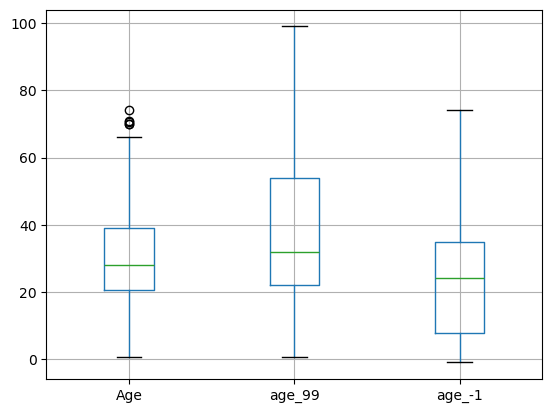

In [24]:
x_train[['Age', 'age_99', 'age_-1']].boxplot()

<Axes: >

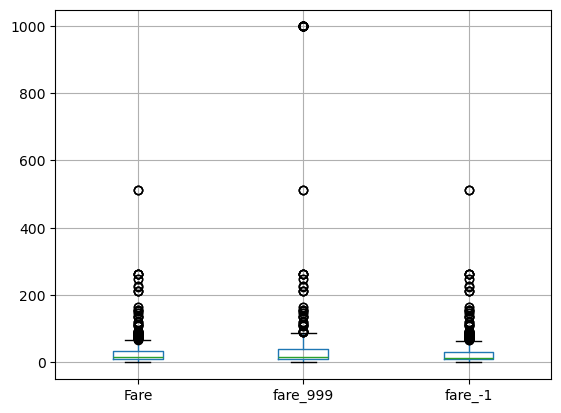

In [25]:
x_train[['Fare', 'fare_999', 'fare_-1']].boxplot()

In [26]:
#Using sklearn

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [30]:
imputer1 = SimpleImputer(strategy = 'constant',fill_value = 99)
imputer2 = SimpleImputer(strategy = 'constant',fill_value = 999)

In [31]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Fare']),
    ('imputer2',imputer2,['Age'])
    
],remainder = 'passthrough')

In [32]:
trf.fit(x_train)

C:\Users\Rajvardhan\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Fare']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Age'])])

In [33]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [34]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [35]:
x_train = trf.transform(x_train)
x_test = trf.transform(x_test)